<h2><center> <span style = "font-family: Babas; font-size: 2em;"> E-commerce Product Categorization </span> </center></h2>
<h4><center> <span style = "font-family: Babas; font-size: 2em; font-style: bold"> With TF-IDF and Word2Vec </span> </center></h4>
<h4><center> <span style = "font-family: Babas; font-size: 2em;"> RANJAN VERNEKAR </span> </center></h4>

### Overview

The objective of the project is to classify [**e-commerce**](https://en.wikipedia.org/wiki/E-commerce) products into categories, based on its description available in the e-commerce platforms. We carried out the following steps in this notebook:

- Performed basic [**exploratory data analysis**](https://en.wikipedia.org/wiki/Exploratory_data_analysis), missing values , unique values , etc
- Used [**TF-IDF**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) vectorizer on the normalized product descriptions for **text vectorization**, compared the baseline performance of several classifiers, and performed [**hyperparameter tuning**](https://en.wikipedia.org/wiki/Hyperparameter_optimization) on the [**random_classifier**](https://en.wikipedia.org/wiki/random_classifier) 
- Used [**TF-IDF**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) vectorizer on the normalized product descriptions for **text vectorization**, compared the baseline performance of several classifiers, used  a deep learning model called [**sequential_model**] 
- Employed the model with the highest validation accuracy to predict the labels of the test observations and obtained a test accuracy of $0.968939$.(randomclssifier)


## Ecommerce Product Categorization

### Introduction

E-commerce platforms often have a vast array of products, making it essential to categorize products effectively. Accurate categorization not only improves the searchability and navigation for customers but also enhances the overall user experience. In this project, we aim to develop a machine learning model to categorize products based on their descriptions.

### Objective

The objective of this project is to build a classification model that can predict the product category based on the product descriptions. We'll use a combination of traditional machine learning techniques and deep learning models to achieve this.

### Dataset

The dataset used for this project consists of e-commerce product data, including features such as descriptions, product categories, prices, ratings, and more. The key columns utilized in this project include:
- `description`: The textual description of the product.
- `product_category_tree`: The target variable representing the product category.


# Ecommerce Product Categorization

## Introduction

E-commerce platforms often have a vast array of products, making it essential to categorize products effectively. Accurate categorization not only improves the searchability and navigation for customers but also enhances the overall user experience. In this project, we aim to develop a machine learning model to categorize products based on their descriptions.

## Objective

The objective of this project is to build a classification model that can predict the product category based on the product descriptions. We'll use a combination of traditional machine learning techniques and deep learning models to achieve this.

## Dataset

The dataset used for this project consists of e-commerce product data, including features such as descriptions, product categories, prices, ratings, and more. The key columns utilized in this project include:
- `description`: The textual description of the product.
- `product_category_tree`: The target variable representing the product category.

## Preprocessing

Data preprocessing is a crucial step in preparing the dataset for modeling. The following steps were performed:

- **Loading the Dataset**: Load the dataset using Pandas.
- **Handling Missing Values**: Fill missing values in the `overall_rating` column with the mean rating.
- **Label Encoding**: Encode the target variable `product_category_tree` using Label Encoder.
- **Text Feature Extraction**: Convert the `description` text features to numerical features using TF-IDF Vectorizer.
- **Balancing the Dataset**: Apply SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance.



# importing liabraries

In [3]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Deep Learning
import tensorflow as tf
from tensorflow import keras

# Statistics
import scipy.stats as stats

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Random Seed for Reproducibility
np.random.seed(42)

print('Data science libraries imported successfully!')

Data science libraries imported successfully!


In [ ]:
data1=pd.read_csv(r"C:\Users\ranja\OneDrive\Desktop\hackathon\Data Science - Hackathon\train_product_data.csv")
data2=pd.read_csv(r"C:\Users\ranja\OneDrive\Desktop\hackathon\Data Science - Hackathon\test_data.csv")
# dat1 

data1 + dat2 ==dataset

In [4]:
dataset=pd.read_csv(r"C:\Users\ranja\OneDrive\Desktop\hackathon\Dataset\combined data.csv")

In [52]:
dataset.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Women's Cycling Shorts             Clothing    
3                Alisha Solid Women's Cycling Shorts             Clothing    
4  dilli bazaaar Bellies, Corporate Casuals, Casuals             Footwear    

                pid  retail_price  discounted_price  \
0  SRTEH2FF9KEDEFGF         999.0             379.0   
1  SHOEH4GRSUBJGZXE         999.0             499.0   
2  SRTEH2F6HUZMQ6SJ         699.0             267.0   
3  SRTEH2FVVKRBAXHB        1199.0             479.0   
4  SHOEH3DZBFR88SCK         699.0             349.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
2  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
3  ["http://img6a.flixcart.com/image/short/p/j/z/...                    False   
4  ["http://img6a.flixcart.com/image/shoe/b/p/n/p...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
2  Key Features of Alisha Solid Women's Cycling S...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Key Features of dilli bazaaar Bellies, Corpora...  No rating available   

        overall_rating          brand  \
0  No rating available         Alisha   
1  No rating available             AW   
2  No rating available         Alisha   
3  No rating available         Alisha   
4  No rating available  dilli bazaaar   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Ideal For"...  
2  {"product_specification"=>[{"key"=>"Number of ...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Occasion",...

# basic data preparation and eda

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17533 entries, 0 to 17532
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  17533 non-null  object 
 1   crawl_timestamp          17533 non-null  object 
 2   product_url              17533 non-null  object 
 3   product_name             17533 non-null  object 
 4   product_category_tree    17533 non-null  object 
 5   pid                      17533 non-null  object 
 6   retail_price             17472 non-null  float64
 7   discounted_price         17472 non-null  float64
 8   image                    17530 non-null  object 
 9   is_FK_Advantage_product  17533 non-null  bool   
 10  description              17532 non-null  object 
 11  product_rating           17533 non-null  object 
 12  overall_rating           17533 non-null  object 
 13  brand                    12301 non-null  object 
 14  product_specifications

In [54]:
dataset.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 61
discounted_price             61
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      5232
product_specifications       11
dtype: int64

### here there are many null values in brand and other columns which we will not bother as for model we will only need 2 columns the description and product category tree based on it will create a model

In [55]:
dataset.dropna(subset=["description"],inplace=True)

In [56]:
dataset.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 61
discounted_price             61
image                         3
is_FK_Advantage_product       0
description                   0
product_rating                0
overall_rating                0
brand                      5231
product_specifications       11
dtype: int64

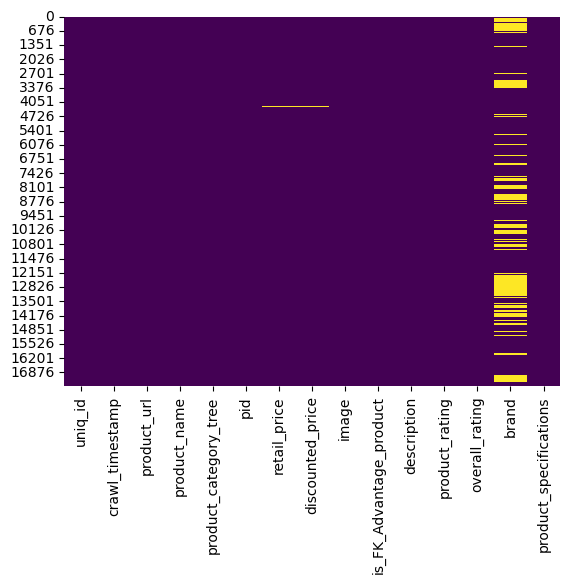

In [57]:
# visualizing the data FOR TRAINING SET
sns.heatmap(data=dataset.isnull(),cbar=False,cmap="viridis")
plt.show()

### as we can see here majority of brand values are missing

In [58]:
dataset["product_category_tree"].value_counts()

product_category_tree
Clothing                       6197
Jewellery                      3531
Footwear                       1227
Mobiles & Accessories          1099
Automotive                     1012
Home Decor & Festive Needs      929
Kitchen & Dining                647
Computers                       578
Watches                         530
Baby Care                       483
Tools & Hardware                391
Toys & School Supplies          330
Pens & Stationery               313
Bags, Wallets & Belts           265
Name: count, dtype: int64

### here we see there is a class imbalance in our target data below we will see the percentage of data missing 

In [59]:
# Calculate the percentage of each category
from plotly import express as px
category_counts = dataset['product_category_tree'].value_counts()
category_percentage = (category_counts / category_counts.sum()) * 100


category_df = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': category_percentage.values
})

# Create an interactive pie chart
fig = px.pie(category_df, names='Category', values='Percentage', title='Category Distribution with Percentage')

# Customize the chart (optional)
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

### getting another insight on the top 20 brands on the platform which sell more products 

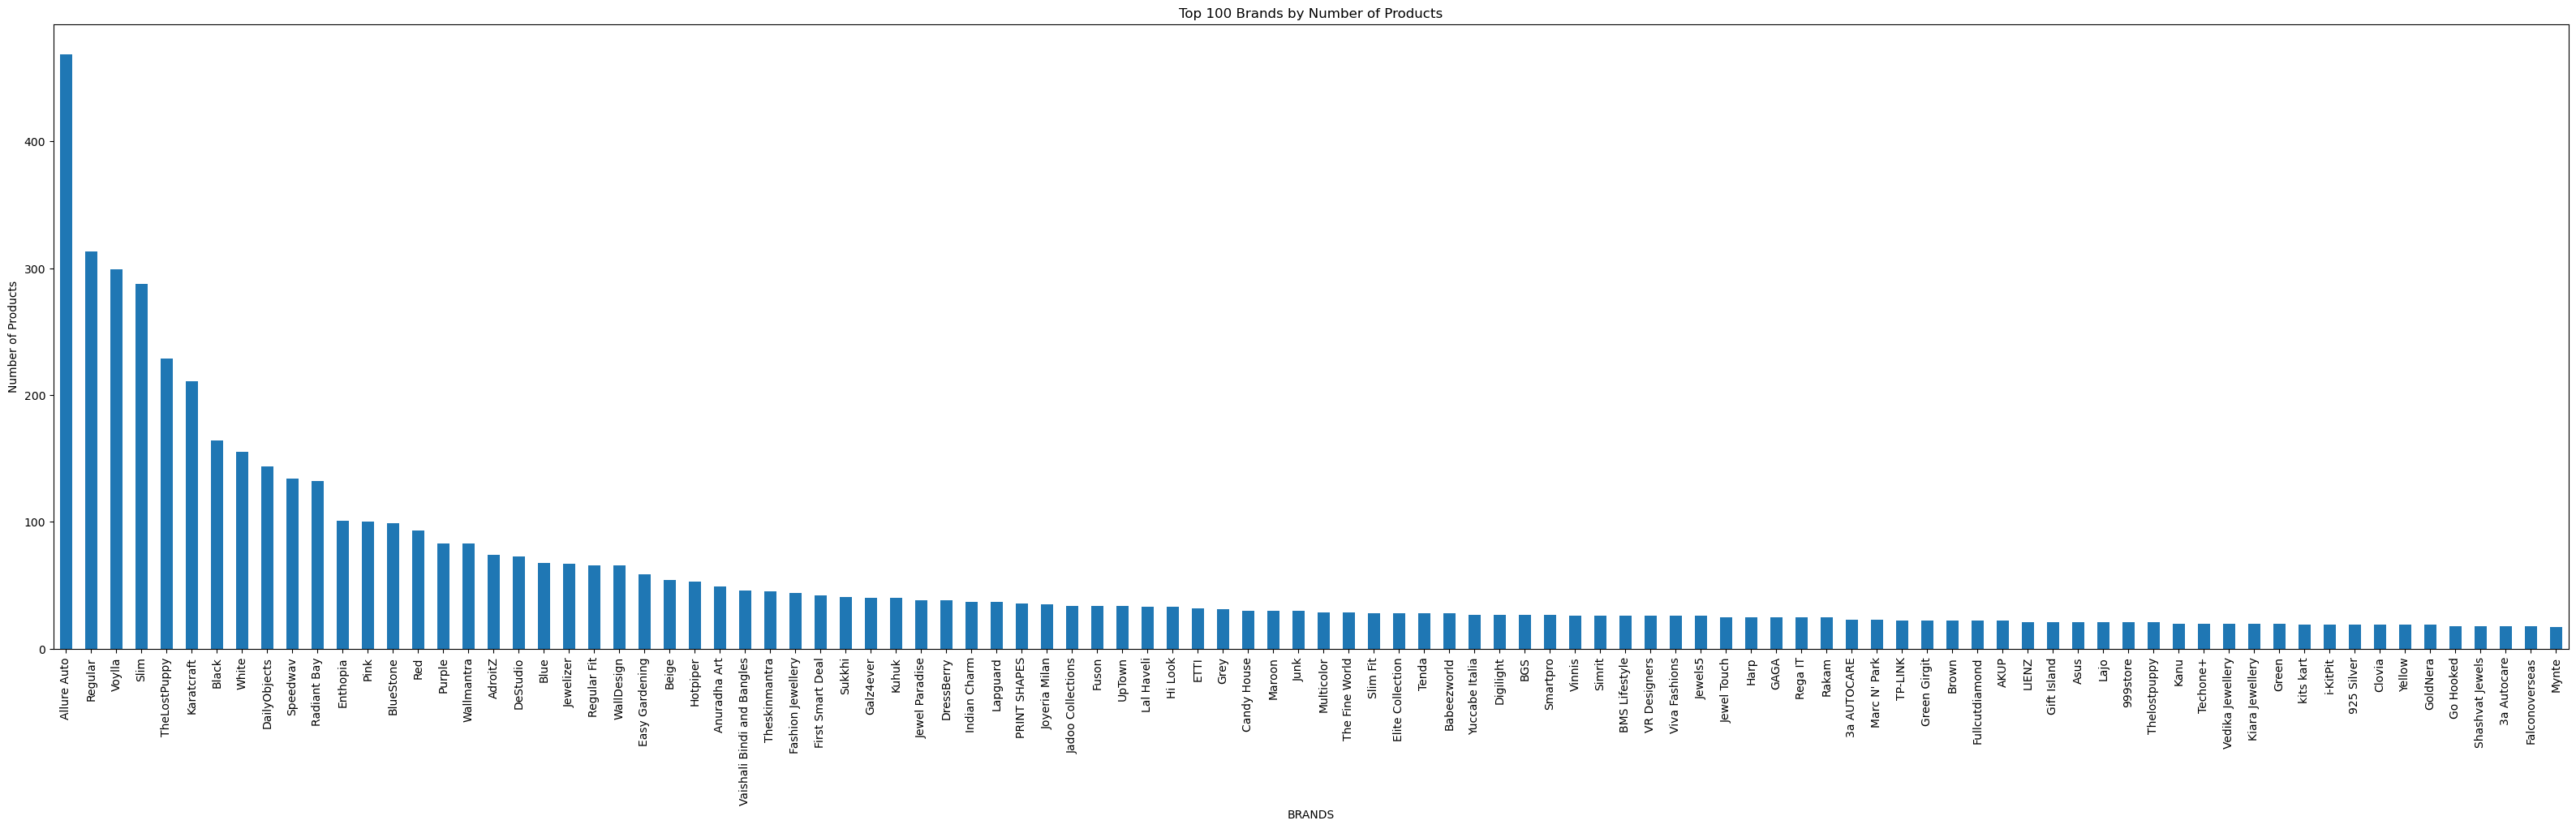

In [90]:


# Count the frequency of each brand
brand_counts = dataset['brand'].value_counts()

# Get the top 20 brands, sorted from smallest to largest
top_20_brands = brand_counts.nlargest(100).sort_values(ascending=False)

# Plot the frequencies of products for the top 20 brands
plt.figure(figsize=(40, 10))
top_20_brands.plot(kind='bar')
plt.title('Top 100 Brands by Number of Products')
plt.xlabel('BRANDS')
plt.ylabel('Number of Products')
plt.show()



### AS WE CAN SEE THAT ALLURE AUTO SELLS MAXIMUM PRODUCTS ON THE PLATFORM

In [92]:
# Handling missing values
dataset['retail_price'].fillna(dataset['retail_price'].median(), inplace=True)
dataset['discounted_price'].fillna(dataset['discounted_price'].median(), inplace=True)



## here plotting chart netween the retail price and discounted price

In [95]:


# Handling missing values
dataset['retail_price'].fillna(dataset['retail_price'].median(), inplace=True)
dataset['discounted_price'].fillna(dataset['discounted_price'].median(), inplace=True)

# Find the maximum values
max_retail_price = dataset['retail_price'].max()
max_discounted_price = dataset['discounted_price'].max()

print(f"Maximum Retail Price: {max_retail_price}")
print(f"Maximum Discounted Price: {max_discounted_price}")


Maximum Retail Price: 571230.0
Maximum Discounted Price: 571230.0


In [5]:


import plotly.express as px



# Handling missing values
dataset['retail_price'].fillna(dataset['retail_price'].median(), inplace=True)
dataset['discounted_price'].fillna(dataset['discounted_price'].median(), inplace=True)

# Create a new column 'max_price' that takes the maximum of 'retail_price' and 'discounted_price'
dataset['max_price'] = dataset[['retail_price', 'discounted_price']].max(axis=1)

# Create an interactive scatter plot for retail price vs. discounted price with axis limits set to 70000
fig = px.scatter(dataset, x='retail_price', y='discounted_price',color='max_price',trendline='ols',
                 title='Retail Price vs. Discounted Price',
                 labels={'retail_price': 'Retail Price', 'discounted_price': 'Discounted Price'},
                 hover_data=['product_name', 'brand', 'max_price'])

# Update layout to include max_price as an annotation or color scale
fig.update_layout(xaxis_title='Retail Price', yaxis_title='Discounted Price', xaxis_range=[0, 70000], yaxis_range=[0, 70000])

fig.show()




In [6]:

import plotly.express as px

# Handling missing values
dataset['retail_price'].fillna(dataset['retail_price'].median(), inplace=True)
dataset['discounted_price'].fillna(dataset['discounted_price'].median(), inplace=True)

# Create a new column 'price_difference' that represents the difference between 'retail_price' and 'discounted_price'
dataset['price_difference'] = dataset['retail_price'] - dataset['discounted_price']

# Create an interactive scatter plot for price difference vs. retail price
fig = px.scatter(dataset, x='retail_price', y='price_difference', color='price_difference',trendline="ols",
                 title='Retail Price vs. Price Difference',
                 labels={'retail_price': 'Retail Price', 'price_difference': 'Price Difference'},
                 hover_data=['product_name', 'brand'])

# Update layout to include the axis range
fig.update_layout(xaxis_title='Retail Price', yaxis_title='Price Difference', xaxis_range=[0, 70000], yaxis_range=[-20000, 70000])

fig.show()


### from the above chart we can say that there is no significant price difference 

In [109]:


# Handling missing values for ratings
dataset['overall_rating'].fillna(0, inplace=True)


# Create an interactive bar chart for average rating by category with a different color palette
fig = px.bar(data_frame=dataset, x='product_category_tree', y='overall_rating', color='overall_rating',
             title='Average Rating by Product Category',
             labels={'product_category_tree': 'Product Category', 'overall_rating': 'Average Rating'},
             color_continuous_scale='Viridis')

# Update layout for better readability
fig.update_layout(xaxis_title='Product Category', yaxis_title='Average Rating', xaxis_tickangle=-45)

fig.show()





### as we can see customers satisfaction will leads to more prople buying that same product 

In [ ]:


# Handling missing values for prices
dataset['retail_price'].fillna(dataset['retail_price'].median(), inplace=True)
dataset['discounted_price'].fillna(dataset['discounted_price'].median(), inplace=True)

# Ensure product_category_tree is treated as a string
dataset['product_category_tree'] = dataset['product_category_tree'].astype(str)

# Calculate the average retail price and discounted price for each product category
category_prices = dataset.groupby('product_category_tree').agg({
    'retail_price': 'mean',
    'discounted_price': 'mean'
}).reset_index()

# Melt the dataframe for plotting
category_prices_melted = category_prices.melt(id_vars='product_category_tree', 
                                              value_vars=['retail_price', 'discounted_price'],
                                              var_name='Price Type', 
                                              value_name='Price')

# Create an interactive bar chart for average retail price and discounted price by category
fig = px.bar(category_prices_melted, x='product_category_tree', y='Price', color='Price Type',
             title='Average Retail Price and Discounted Price by Product Category',
             labels={'product_category_tree': 'Product Category', 'Price': 'Average Price'},
             barmode='group', height=600, color_discrete_sequence=px.colors.qualitative.Plotly)

# Update layout for better readability
fig.update_layout(xaxis_title='Product Category', yaxis_title='Average Price', xaxis_tickangle=-45)

fig.show()



## as we can see retail proice and jewellery price is more 

In [9]:


# Handling missing values for product ratings
dataset['overall_rating'].fillna(0, inplace=True)

# Ensure product_category_tree is treated as a string
dataset['product_category_tree'] = dataset['product_category_tree'].astype(str)

# Calculate the number of ratings for each product category
category_ratings_count = dataset.groupby('product_category_tree')['overall_rating'].count().reset_index()

# Rename the columns for better readability
category_ratings_count.columns = ['Product Category', 'Number of Ratings']

# Create an interactive bar chart for the number of ratings by category
fig = px.bar(category_ratings_count, x='Product Category', y='Number of Ratings', color='Number of Ratings',
             title='Number of Ratings by Product Category',
             labels={'Product Category': 'Product Category', 'Number of Ratings': 'Number of Ratings'},
             color_continuous_scale='Viridis')

# Update layout for better readability
fig.update_layout(xaxis_title='Product Category', yaxis_title='Number of Ratings', xaxis_tickangle=-45)

fig.show()


## this shows number of ratings based on product category , which will show us most products people  bought from which category 

## Machine Learning Model

A Random Forest Classifier was used as the machine learning model for initial categorization. The steps involved include:

- **Stratified Train-Test Split**: Split the data into training and testing sets in a stratified manner.
- **Model Training**: Train the Random Forest Classifier on the resampled training data.
- **Model Evaluation**: Evaluate the model using accuracy, F1 score, and classification report.


# model creation using randomclassifier 

In [63]:
# Feature and target variables
X = dataset['description']
y = dataset['product_category_tree']

In [64]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [65]:
# Stratified split of data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


## converting from text to features 

In [66]:
# Convert text features to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## handling class imbalances 

In [67]:
# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [68]:
# Train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [70]:
# Predictions and evaluation on training data
from sklearn.metrics import accuracy_score, classification_report
train_predictions = random_forest.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
train_report = classification_report(y_train_resampled, train_predictions)

In [73]:
# Predictions and evaluation on test data
from sklearn.metrics import f1_score

test_predictions = random_forest.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions, average='weighted')

# Print evaluation results
print("Training Accuracy: ", train_accuracy)

print("Test Accuracy: ", test_accuracy)


Training Accuracy:  0.9999711807256694
Test Accuracy:  0.960650128314799


## Cross-Validation

To ensure the robustness of the model, cross-validation was performed using `StratifiedKFold` and `cross_val_score`. The F1 score was used as the evaluation metric.


## performing the cross validation and f1 scores 

In [74]:
# Perform stratified cross-validation and calculate F1 scores
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='weighted')
kf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(random_forest, X_train_resampled, y_train_resampled, cv=kf, scoring=scorer)
print("Cross-Validation F1 Scores: ", cv_scores) 
print("Mean Cross-Validation F1 Score: ", np.mean(cv_scores)) 
print("Test F1 Score: ", test_f1_score)

Cross-Validation F1 Scores:  [0.99126272 0.9992795  0.99834259 0.99906337 0.99920699]
Mean Cross-Validation F1 Score:  0.9974310352130482
Test F1 Score:  0.9601004539976371


## Hyperparameter Tuning

Hyperparameter tuning was performed using `GridSearchCV` to find the best parameters for the Random Forest Classifier. The parameter grid included:

- `n_estimators`
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `max_features`


## performing hyperparameter tuning which is optional as we have got the accuracy of test as $96.055$

In [110]:
# Set up parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

scorer = make_scorer(f1_score, average='weighted')

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring=scorer, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


## Deep Learning Model

A neural network was built and trained for product categorization. The neural network architecture included dense layers with dropout to prevent overfitting. The steps involved include:

- **Model Building**: Construct the neural network using `Sequential`, adding dense and dropout layers.
- **Model Compilation**: Compile the model using the Adam optimizer and categorical cross-entropy loss.
- **Model Training**: Train the model on the resampled training data.
- **Model Evaluation**: Evaluate the model using accuracy, F1 score, and classification report.


# deep learning model using sequential

## importing liabraries

In [45]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

### converting the resampled dense matrix data to categorical

In [46]:
# Convert resampled target back to categorical
y_train_resampled_categorical = to_categorical(y_train_resampled)


In [47]:
# Build the neural network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_resampled_categorical.shape[1], activation='softmax'))

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
history = model.fit(X_train_resampled.toarray(), y_train_resampled_categorical, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 190s 107ms/step - accuracy: 0.8915 - loss: 0.4542 - val_accuracy: 0.9723 - val_loss: 0.0755
Epoch 2/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 185s 106ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 0.9625 - val_loss: 0.1198
Epoch 3/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 179s 103ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9790 - val_loss: 0.0699
Epoch 4/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 184s 106ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 0.9836 - val_loss: 0.0604
Epoch 5/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 192s 110ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9926 - val_loss: 0.0211
Epoch 6/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 184s 106ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9916 - val_loss: 0.0244
Epoch 7/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 182s 105ms/step - accuracy: 0.9996 - loss: 0.0020 - val_accuracy: 0.9956 - val_loss: 0.0119
Epoch 8/10
1735/1735 ━━━━━━━━━━━━━━━━━━━━ 180s 104ms/step - ac

## Results

The results of the machine learning and deep learning models were compared based on their performance metrics. The key metrics evaluated include:
- Training Accuracy
- Test Accuracy
- F1 Score
- Classification Report


## test accuracy here

In [80]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, classification_report

# Convert y_test to categorical format
y_test_categorical = to_categorical(y_test)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_categorical)
test_predictions = model.predict(X_test_tfidf.toarray())

# Convert predictions to label format for evaluation
test_predictions_labels = test_predictions.argmax(axis=1)
y_test_labels = y_test_categorical.argmax(axis=1)

# Calculate F1 score
test_f1_score = f1_score(y_test_labels, test_predictions_labels, average='weighted')

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9785 - loss: 0.2069
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


## results here

In [81]:


# Print evaluation results
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)
print("Test Classification Report: \n", classification_report(y_test_labels, test_predictions_labels))


Test Loss:  0.20388354361057281
Test Accuracy:  0.9797548055648804
Test F1 Score:  0.9800056811613775
Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       202
           1       0.98      0.88      0.92        97
           2       0.98      0.92      0.95        53
           3       0.99      1.00      0.99      1240
           4       0.99      0.91      0.95       116
           5       1.00      0.98      0.99       245
           6       1.00      0.95      0.97       186
           7       1.00      1.00      1.00       706
           8       0.98      0.99      0.99       129
           9       0.94      1.00      0.97       220
          10       0.85      0.92      0.89        63
          11       0.96      0.99      0.97        78
          12       0.73      0.86      0.79        66
          13       1.00      0.98      0.99       106

    accuracy                           0.98      3507
  

## Conclusion

The project demonstrated the effectiveness of using both traditional machine learning techniques and deep learning models for e-commerce product categorization. Hyperparameter tuning and cross-validation helped enhance the model's performance, and balancing the dataset using SMOTE addressed the issue of class imbalance.


## Future Work

Future improvements could include exploring more sophisticated text preprocessing techniques, trying out other deep learning architectures such as LSTM or Transformers, and fine-tuning the hyperparameters further for better performance.
